## <span style="color: orange">Bộ số liệu trong một mùa giải ở giải bóng đá La Liga mùa 2018/2019</span>

 Trong dự án này, tôi sẽ phân tích một tệp dữ liệu về các thông số trong một mùa giải ở La Liga.

 Mục tiêu của phân tích của tôi là xác định một số chỉ số đáng chú ý trong các trận đấu của các cầu thủ. Các chỉ số này có thể là số lần ra sân, số bàn thắng, số lần phạm lỗi, v.v.

### <span style="color: green">Bộ dữ liệu phân tích số liệu ở La Liga</span>

 Prabhat đã cung cấp tệp dữ liệu mà tôi sẽ phân tích và bạn có thể tải xuống từ [Kaggle](https://www.kaggle.com/datasets/thegreatcoder/laliga-player-stats).


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import pandas as pd
import seaborn as sns

In [2]:
all_data = pd.read_csv(r'laliga_player_stats_english.csv', encoding = 'UTF-8')

In [3]:
print(all_data)

                   Team    Position  Shirt number              Name  \
0         Athletic Club  Goalkeeper           NaN      Hodei Oleaga   
1         Athletic Club  Goalkeeper           1.0         A. Remiro   
2         Athletic Club  Goalkeeper          13.0          Herrerín   
3         Athletic Club  Goalkeeper          25.0        Unai Simón   
4         Athletic Club    Defender           3.0             Núñez   
5         Athletic Club    Defender           4.0       I. Martínez   
6         Athletic Club    Defender           5.0             Yeray   
7         Athletic Club    Defender           6.0          San José   
8         Athletic Club    Defender          12.0           Yuri B.   
9         Athletic Club    Defender          15.0          I. Lekue   
10        Athletic Club    Defender          24.0        Balenziaga   
11        Athletic Club  Midfielder           NaN        Nolaskoain   
12        Athletic Club  Midfielder           7.0             Beñat   
13    

In [4]:
print(all_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 62 columns):
Team                                     556 non-null object
Position                                 556 non-null object
Shirt number                             526 non-null float64
Name                                     556 non-null object
Minutes played                           556 non-null float64
Games played                             556 non-null int64
Percentage of games played               556 non-null object
Full games played                        556 non-null int64
Percentage of full games played          556 non-null object
Games started                            556 non-null int64
Percentage of games started              556 non-null object
Games where substituted                  556 non-null int64
Percentage of games where substituted    556 non-null object
Yellow Cards                             556 non-null int64
Red Cards                                556

In [5]:
print(all_data.head(10))

            Team    Position  Shirt number          Name  Minutes played  \
0  Athletic Club  Goalkeeper           NaN  Hodei Oleaga           0.000   
1  Athletic Club  Goalkeeper           1.0     A. Remiro           0.000   
2  Athletic Club  Goalkeeper          13.0      Herrerín           2.790   
3  Athletic Club  Goalkeeper          25.0    Unai Simón         630.000   
4  Athletic Club    Defender           3.0         Núñez           1.063   
5  Athletic Club    Defender           4.0   I. Martínez           2.903   
6  Athletic Club    Defender           5.0         Yeray           2.614   
7  Athletic Club    Defender           6.0      San José           1.716   
8  Athletic Club    Defender          12.0       Yuri B.           3.120   
9  Athletic Club    Defender          15.0      I. Lekue         210.000   

   Games played Percentage of games played  Full games played  \
0             0                      0.00%                  0   
1             0                  

In [6]:
all_data.isnull().sum()

Team                                      0
Position                                  0
Shirt number                             30
Name                                      0
Minutes played                            0
Games played                              0
Percentage of games played                0
Full games played                         0
Percentage of full games played           0
Games started                             0
Percentage of games started               0
Games where substituted                   0
Percentage of games where substituted     0
Yellow Cards                              0
Red Cards                                 0
Second Yellows                            0
Goals scored                              0
Penalties scored                          0
Own goals                                 0
Goals conceded while player on pitch      0
Tackles                                   0
Interceptions                             0
Recoveries                      

In [7]:
list(all_data.columns)

['Team',
 'Position',
 'Shirt number',
 'Name',
 'Minutes played',
 'Games played',
 'Percentage of games played',
 'Full games played',
 'Percentage of full games played',
 'Games started',
 'Percentage of games started',
 'Games where substituted',
 'Percentage of games where substituted',
 'Yellow Cards',
 'Red Cards',
 'Second Yellows',
 'Goals scored',
 'Penalties scored',
 'Own goals',
 'Goals conceded while player on pitch',
 'Tackles',
 'Interceptions',
 'Recoveries',
 'Clearances',
 'Successful tackles',
 'Unssuccessful tackles',
 'Last man',
 'Successful duels',
 'Duels lost',
 'Successful aerial challenges',
 'Unsuccessful aerial challenges',
 'Offsides',
 'Fouls suffered',
 'Fouls committed',
 'Penalties won',
 'Penalties given away',
 'Handballs committed',
 'Fouls committed per card',
 'Shots',
 'Shots on target',
 'Assists',
 'Successful dribbles',
 'Unsuccessful dribbles',
 'Goals scored.1',
 'From inside the area',
 'From outside the area',
 'Goals with left foot',
 'G

##### <span style="color: green"> Bộ dữ liệu có một sheet tên là laliga_stats.</span>

*Trong sheet 'laliga_stats' này có 557 hàng và 62 cột, và có 30 giá trị rỗng trong cột Shirt number.*


### <span style="color: green">Phân tích các thông số của cầu thủ</span> 

*Tôi sẽ bắt đầu việc phân tích của mình bằng cách kiểm tra sự phân phối dữ liệu.*


##### 1. Cleaning dataset

*Trong cột 'Shirt number' tồn tại 30 ô không có giá trị, tôi sẽ thay thế ô trống đó bằng 'Unknown' để dễ quan sát hơn*

In [8]:
all_data = all_data.fillna('Unknown')
all_data.isnull().sum()

Team                                     0
Position                                 0
Shirt number                             0
Name                                     0
Minutes played                           0
Games played                             0
Percentage of games played               0
Full games played                        0
Percentage of full games played          0
Games started                            0
Percentage of games started              0
Games where substituted                  0
Percentage of games where substituted    0
Yellow Cards                             0
Red Cards                                0
Second Yellows                           0
Goals scored                             0
Penalties scored                         0
Own goals                                0
Goals conceded while player on pitch     0
Tackles                                  0
Interceptions                            0
Recoveries                               0
Clearances 

In [9]:
print(all_data.head(5))

            Team    Position Shirt number          Name  Minutes played  \
0  Athletic Club  Goalkeeper      Unknown  Hodei Oleaga           0.000   
1  Athletic Club  Goalkeeper            1     A. Remiro           0.000   
2  Athletic Club  Goalkeeper           13      Herrerín           2.790   
3  Athletic Club  Goalkeeper           25    Unai Simón         630.000   
4  Athletic Club    Defender            3         Núñez           1.063   

   Games played Percentage of games played  Full games played  \
0             0                      0.00%                  0   
1             0                      0.00%                  0   
2            31                     82.00%                 31   
3             7                     18.00%                  7   
4            12                     32.00%                 11   

  Percentage of full games played  Games started            ...             \
0                           0.00%              0            ...              
1 

##### 2. Starting the analysis

### <span style="color: green">Phân tích thời gian ra sân của các cầu thủ ở các vị trí là thủ môn, hậu vệ, tiền vệ và tiền đạo.</span>

In [10]:
#Xu li so lieu ve cung he so
all_data.loc[all_data['Minutes played'] < 4, 'Minutes played'] = all_data['Minutes played'] * 1000
all_data.loc[all_data['Short passes'] < 4, 'Short passes'] = all_data['Short passes'] * 1000
all_data["Short passes"] = all_data["Short passes"].astype(int)
all_data["Passes"] = all_data["Passes"].astype(int)
all_data["Minutes played"] = all_data["Minutes played"].astype(int)
all_data.loc[all_data['Passes'] < 4, 'Passes'] = all_data['Passes'] * 1000
all_data

,Team,Position,Shirt number,Name,Minutes played,Games played,Percentage of games played,Full games played,Percentage of full games played,Games started,...,Corners,Tackles.1,Duels,Man-to-man duels,Aerial duels,Passes,Short passes,Long passes,Through balls,Goals scored per attempt
0,Athletic Club,Goalkeeper,Unknown,Hodei Oleaga,0,0,0.00%,0,0.00%,0,...,0,0,0,0,0,0,0,0,0,0
1,Athletic Club,Goalkeeper,1,A. Remiro,0,0,0.00%,0,0.00%,0,...,0,0,0,0,0,0,0,0,0,0
2,Athletic Club,Goalkeeper,13,Herrerín,2790,31,82.00%,31,82.00%,31,...,0,0,25,6,19,887,128,759,1,0
3,Athletic Club,Goalkeeper,25,Unai Simón,630,7,18.00%,7,18.00%,7,...,0,0,3,2,1,155,49,106,0,0
4,Athletic Club,Defender,3,Núñez,1063,12,32.00%,11,29.00%,11,...,0,15,107,38,69,536,457,78,1,0
5,Athletic Club,Defender,4,I. Martínez,2903,33,87.00%,32,84.00%,33,...,0,53,329,162,167,1000,1074,361,5,0
6,Athletic Club,Defender,5,Yeray,2614,30,79.00%,28,74.00%,30,...,0,55,296,126,170,1000,1051,233,0,0
7,Athletic Club,Defender,6,San José,1716,33,87.00%,15,39.00%,16,...,0,42,243,141,102,707,637,64,6,0
8,Athletic Club,Defender,12,Yuri B.,3120,35,92.00%,33,87.00%,35,...,2,48,373,254,119,1000,1273,92,2,1
9,Athletic Club,Defender,15,I. Lekue,210,4,11.00%,2,5.00%,2,...,2,5,29,20,9,85,75,10,0,0


            Minutes played
Position                  
Defender            269229
Forward             135432
Goalkeeper           67859
Midfielder          270929


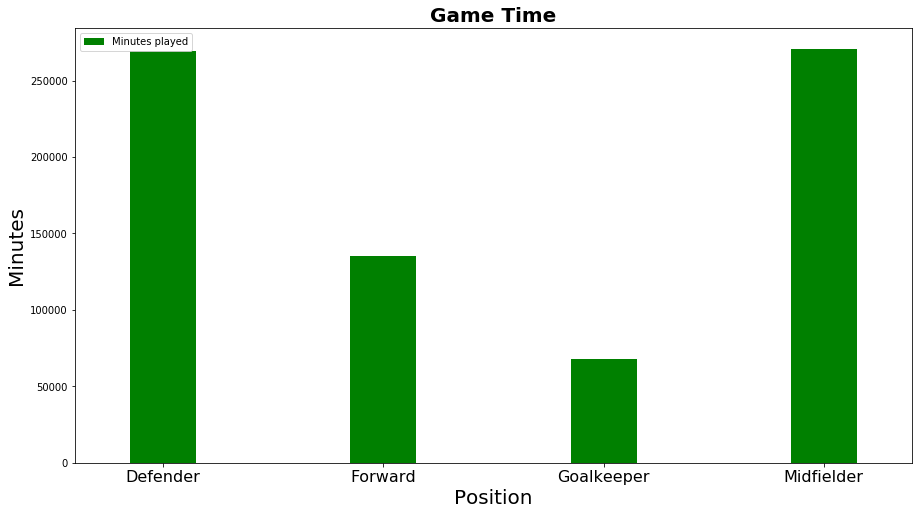

In [11]:
fig = plt.figure(figsize = (15, 8))
ax = fig.add_subplot(111)

df=all_data.groupby(["Position"]).agg({'Minutes played': sum}).sort_values(by = 'Position')
print(df)

#Ve bieu do
df.plot(kind='bar', ax=ax, color='g', width=0.3, legend=True)
plt.xticks(ticks = [ 0, 1, 2, 3], labels = ['Defender', 'Forward', 'Goalkeeper', 'Midfielder'], size = 16, rotation = 0)
plt.legend()
plt.xlabel('Position', size = 20)
plt.ylabel('Minutes', size = 20)
plt.title('Game Time', size=20, weight='bold')
plt.show()

#### <span style="color: blue">Nhận xét:</span>

*Thời gian thi đấu trung bình của các cầu thủ ở từng vị trí:*

- *Thủ môn là vị trí có thời gian thi đấu thấp nhất, điều này là hợp lí, bởi lẽ vị trí thủ môn luôn cần sự ổn định, vì thế thường được cố định cho một cầu thủ, điều này khiến cho chỉ số chung của thủ môn thấp hơn các vị trí khác.*

- *Hậu vệ và tiền đạo là hai vị trí có thời gian thi đấu cao nhất, vì số lượng các cầu thủ thi đấu ở hai vị trí này cần nhiều thể lực hơn, nên thường xuyên được xoay tua, khiến chỉ số này tăng cao.*


### <span style="color: green">Tiếp theo, tôi thực hiện phân tích số thẻ phạt ở từng vị trí của các cầu thủ </span>

            Yellow Cards  Red Cards
Position                           
Defender             766         39
Forward              271         11
Goalkeeper            46          1
Midfielder           743         26


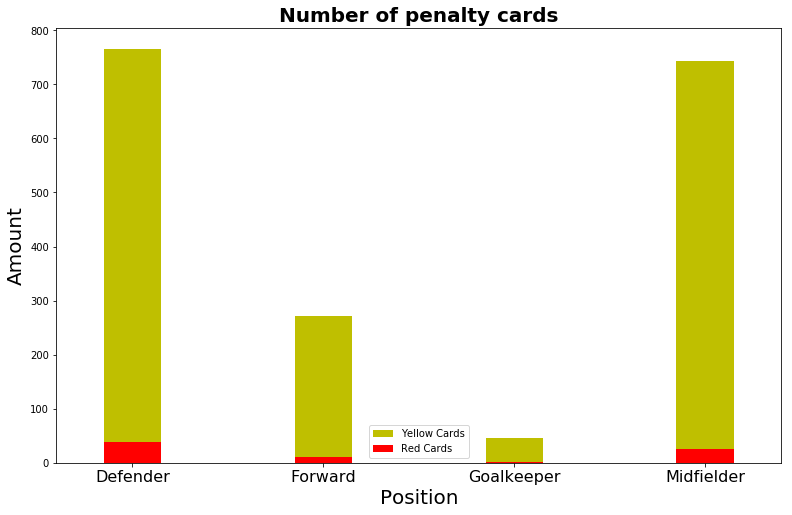

In [12]:
fig = plt.figure(figsize = (13, 8))
ax = fig.add_subplot(111) 

cards = all_data.groupby(["Position"]).agg({'Yellow Cards': sum, 'Red Cards': sum}).sort_values(by = 'Position')
print(cards)

#Ve bieu do
cards['Yellow Cards'].plot(kind='bar', ax=ax, color='y', width=0.3, legend=True)
cards['Red Cards'].plot(kind='bar', ax=ax, color='r', width=0.3, legend=True)
plt.xticks(ticks = [ 0, 1, 2, 3], labels = ['Defender', 'Forward', 'Goalkeeper', 'Midfielder' ], size = 16, rotation = 0)
plt.legend()
plt.xlabel('Position', size = 20 )
plt.ylabel('Amount', size = 20)
plt.title('Number of penalty cards', size=20, weight='bold')
plt.show()

#### <span style="color: blue">Nhận xét:</span>

*Thống kê số thẻ phạt của các cầu thủ ở từng vị trí:*

- *Hậu vệ và tiền vệ nhận số thẻ vàng và thẻ đỏ nhiều nhất, vì họ thường là những người cầm bóng nhiều nhất, cũng như đảm nhận vai trò ngăn chặn các pha tấn công của đối thủ.*

- *Ngược lại, thủ môn là vị trí nhận ít thẻ phạt nhất, vì vị trí mà họ chơi (vòng 16m50) là vùng rất quan trọng, dễ dẫn đến những quả phạt đền, nên những pha phạm lỗi cần được hạn chế tối đa.*


### <span style="color: green">Số bàn thắng theo từng vị trí của các cầu thủ </span>

            Goals scored  Penalties scored
Position                                  
Defender             121                 5
Forward              533                71
Goalkeeper             0                 0
Midfielder           289                28


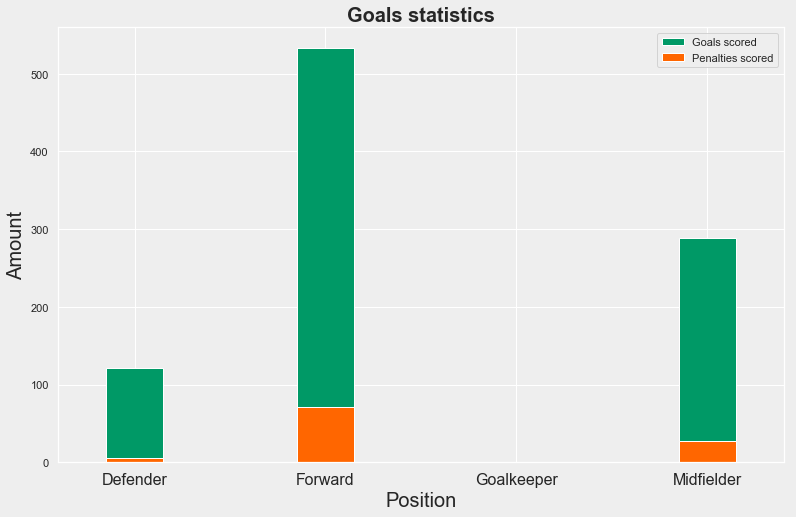

In [23]:
fig = plt.figure(figsize = (13, 8))
ax = fig.add_subplot(111) 

goals_scored = all_data.groupby(["Position"]).agg({'Goals scored': sum, 'Penalties scored': sum}).sort_values(by = 'Position')
print(goals_scored)

#Ve bieu do
goals_scored['Goals scored'].plot(kind='bar', ax=ax, color='#009966', width=0.3, legend=True)
goals_scored['Penalties scored'].plot(kind='bar', ax=ax, color='#FF6600', width=0.3, legend=True)
plt.xticks(ticks = [ 0, 1, 2, 3], labels = ['Defender', 'Forward', 'Goalkeeper', 'Midfielder' ], size = 16, rotation = 0)
plt.legend()
plt.xlabel('Position', size = 20)
plt.ylabel('Amount', size = 20)
plt.title('Goals statistics', size=20, weight='bold')
plt.show()

#### <span style="color: blue">Nhận xét:</span>

 Phân tích về số bàn thắng ghi được:

- *Tiền đạo (Forward) là vị trí ghi được nhiều bàn thắng nhất (cả bàn thắng thông thường và penalty).*
- *Thủ môn (Goalkeeper) là vị trí không ghi được bàn thắng nào.*


### <span style="color: green">Phân tích tổng quan các thông số của từng vị trí cầu thủ </span>

In [14]:
#Lay du lieu theo tung thong so
player_position = all_data['Position']
player_position = pd.unique(player_position)
minutes_played = all_data[['Position', 'Minutes played']]
goal_scored = all_data[['Position','Goals scored']]
passes = all_data[['Position', 'Passes']]
tackles = all_data[['Position', 'Tackles']]
assist = all_data[['Position', 'Assists']]
fouls_suffered = all_data[['Position', 'Fouls suffered']]
recoveries = all_data[['Position', 'Recoveries']]
interceptions= all_data[['Position', 'Interceptions']]
successful_dribbles = all_data[['Position', 'Successful dribbles']]

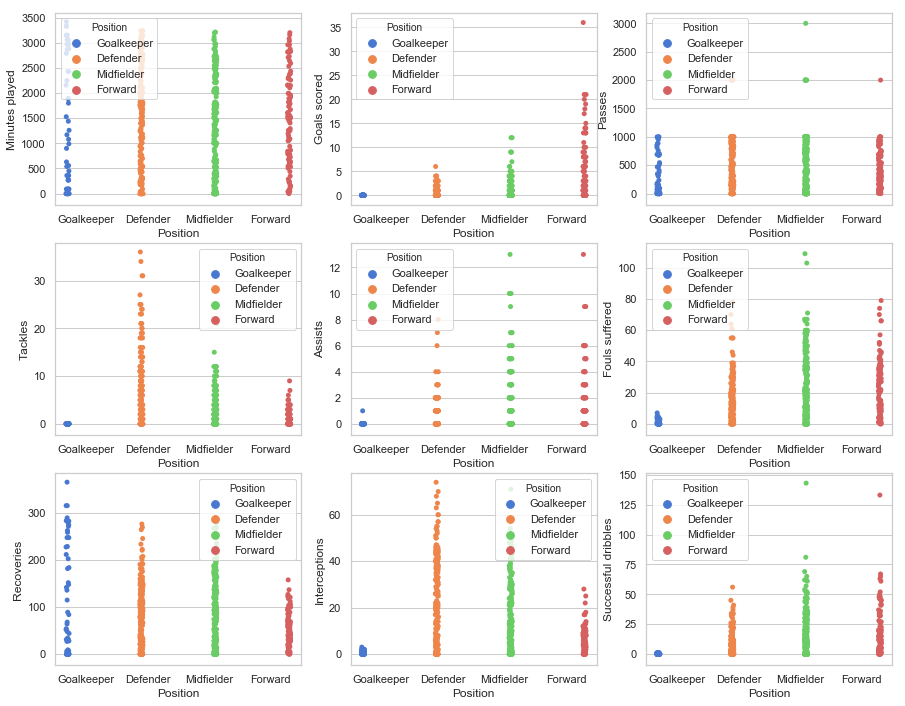

In [26]:
f, axes = plt.subplots(3, 3, figsize=(15,12))
sns.set(style = 'whitegrid')

sns.stripplot(ax = axes[0][0], data=minutes_played,
              x="Position",
              y="Minutes played",
               hue="Position",
              dodge=True,    # separate strips of points of different colors
              palette = "muted", )

sns.stripplot(ax = axes[0][1], data=goal_scored,
              x="Position",
              y="Goals scored",
               hue="Position",
              dodge=True,    # separate strips of points of different colors
              palette = "muted")

sns.stripplot(ax = axes[0][2], data=passes,
              x="Position",
              y="Passes",
               hue="Position",
              dodge=True,    # separate strips of points of different colors
              palette = "muted")

sns.stripplot(ax = axes[1][0], data=tackles,
              x="Position",
              y="Tackles",
               hue="Position",
              dodge=True,    # separate strips of points of different colors
              palette = "muted")

sns.stripplot(ax = axes[1][1], data=assist,
              x="Position",
              y="Assists",
               hue="Position",
              dodge=True,    # separate strips of points of different colors
              palette = "muted")

sns.stripplot(ax = axes[1][2], data=fouls_suffered,
              x="Position",
              y="Fouls suffered",
               hue="Position",
              dodge=True,    # separate strips of points of different colors
              palette = "muted")

sns.stripplot(ax = axes[2][0], data=recoveries,
              x="Position",
              y="Recoveries",
               hue="Position",
              dodge=True,    # separate strips of points of different colors
              palette = "muted")

sns.stripplot(ax = axes[2][1], data=interceptions,
              x="Position",
              y="Interceptions",
               hue="Position",
              dodge=True,    # separate strips of points of different colors
              palette = "muted")

sns.stripplot(ax = axes[2][2], data=successful_dribbles,
              x="Position",
              y="Successful dribbles",
               hue="Position",
              dodge=True,    # separate strips of points of different colors
              palette = "muted")

plt.show()

#### <span style="color: blue">Nhận xét:</span>

Thống kê số thẻ phạt của các cầu thủ ở từng vị trí:

- *Ở thông số số phút thi đấu, thủ môn nhỉnh hơn một chút vì họ thường là vị trí cố định.*

- *Ở thông số ghi bàn, kiến tạo, chuyền bóng, rê dắt bóng, bị phạm lỗi, tiền đạo và tiền vệ chiếm ưu thế hơn hẳn, vì họ chơi gần khung thành đối phương hơn, dễ ghi bàn hơn và cũng dẽ bị phạm lỗi hơn.*
- *Ở thông số tắc bóng, thu hồi bóng, đánh chặn, hậu vệ chiếm ưu thế lớn nhất, vì họ đảm nhận nhiệm vụ bảo vệ khung thành đội nhà, thường xuyên phải đối mặt với tiền đạo đối phương.*



### <span style="color: green">Độ phân tán giữa số bàn thắng và thời gian thi đấu </span>

                Goals scored  Minutes played
Goals scored        1.000000        0.111287
Minutes played      0.111287        1.000000


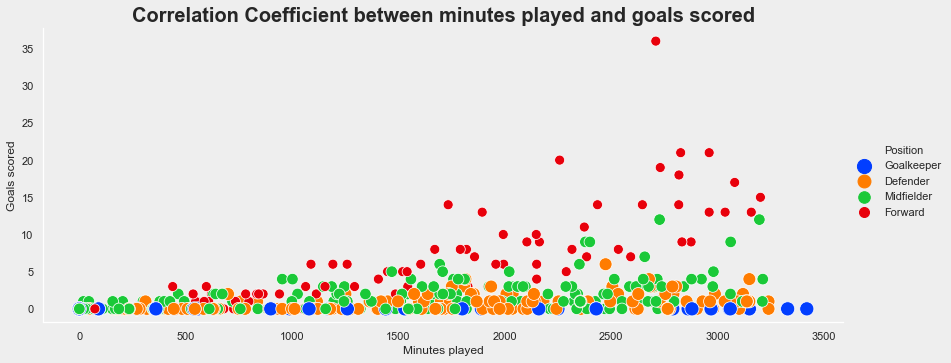

In [16]:
sns.set(rc={'axes.facecolor':'#EEEEEE', 'figure.facecolor':'#EEEEEE'})

ss=all_data.pivot_table(values=['Minutes played','Goals scored'], index='Position',aggfunc='sum')
print(ss.corr())
sns.relplot(data = all_data,x='Minutes played',y='Goals scored',hue='Position',
           size='Position',palette='bright',sizes=(100,200), height=5, aspect=12/5)
plt.title("Correlation Coefficient between minutes played and goals scored",size=20, weight='bold')
plt.grid()
plt.show()

#### <span style="color: blue">Nhận xét:</span>

 Mối tương quan giữa thời gian thi đấu và số bàn thắng ghi được:

- *Nhìn vào biểu đồ, ta thấy các chấm có xu hướng lệch về góc trên bên phải, chứng tỏ hai yếu tố (thời gian thi đấu và số bàn thắng) tỉ lệ thuận với nhau, càng thi đấu nhiều, số bàn thắng ghi được càng cao.*
- *Chấm thể hiện vị trí tiền đạo (màu đỏ) đa số nằm lệch về góc trên bên phải, đúng với thực tế rằng họ là những người ghi bàn nhiều nhất trong đội.*
- *Thủ môn (chấm xanh dương) và hậu vệ (chấm vàng) là hai vị trí ít ghi bàn nhất, vì học đảm nhận vị trí bảo vệ khung thành đội nhà.*


            Goals scored          Team
Name                                  
Messi                 36  FC Barcelona
Benzema               21   Real Madrid
Suárez                21  FC Barcelona
Iago Aspas            20      RC Celta
Stuani                19     Girona FC


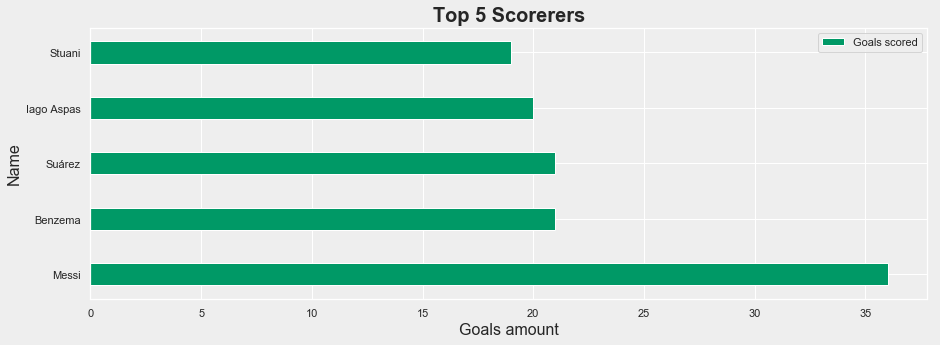

In [17]:
#Top 5 cau thu ghi ban nhieu nhat
player_sort = all_data.groupby(['Name']).agg({'Goals scored': sum, 'Team':sum}).sort_values(by='Goals scored', ascending=False)
df = pd.DataFrame(player_sort)
print(player_sort[:5])
x = player_sort[:5]

#Ve bieu do
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)

x.plot(kind='barh', ax=ax, color='#009966', width=0.4, legend=True, stacked = True)
plt.xlabel('Goals amount', size = 16)
plt.ylabel('Name', size = 16)
plt.title('Top 5 Scorerers', size = 20, weight='bold')
plt.show()


### <span style="color: green">Phân tích mối tương quan giữa số bàn thắng của các cầu thủ trong đội so với tầm vóc của câu lạc bộ </span>

In [18]:
#Tinh tong so ban thang theo tung cau lac bo
goal_club = all_data.groupby(["Team"]).agg({'Goals scored': sum}).sort_values(by = 'Goals scored', ascending = False)
goal_club

,Goals scored
Team,
FC Barcelona,87
Real Madrid,61
Sevilla FC,60
Levante UD,55
Atlético de Madrid,53
Valencia CF,52
RC Celta,52
Villarreal CF,46
Getafe CF,46


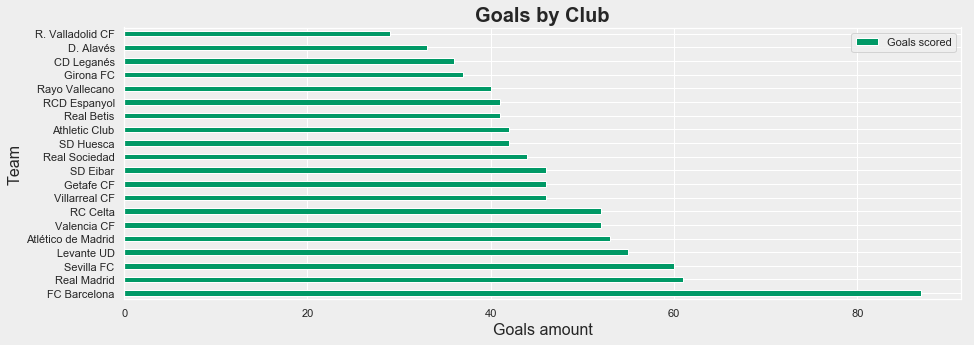

In [19]:
#ve bieu do xep hang 
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)

goal_club.plot(kind='barh', ax=ax, color='#009966', width=0.4, legend=True, stacked = True)
plt.xlabel('Goals amount', size = 16)
plt.ylabel('Team', size = 16)
plt.title('Goals by Club', size = 20, weight='bold')
plt.show()

#### <span style="color: blue">Nhận xét:</span>

 Mối tương quan giữa tầm vóc câu lạc bộ và số bàn thắng ghi được:

- *Nhìn vào biểu đồ, ta thấy top 3 câu lạc bộ ghi bàn nhiều nhất đều là những câu lạc bộ lừng danh như FC Barcelona, Real Madrid hay Sevilla FC.*


In [20]:
passes_club = all_data.groupby(["Team"]).agg({'Passes': sum}).sort_values(by = 'Passes', ascending = False)
passes_club

,Passes
Team,
FC Barcelona,20444
Real Sociedad,18910
Real Madrid,18060
Real Betis,16693
Rayo Vallecano,15899
Sevilla FC,15660
Valencia CF,15295
Atlético de Madrid,14957
RC Celta,14746


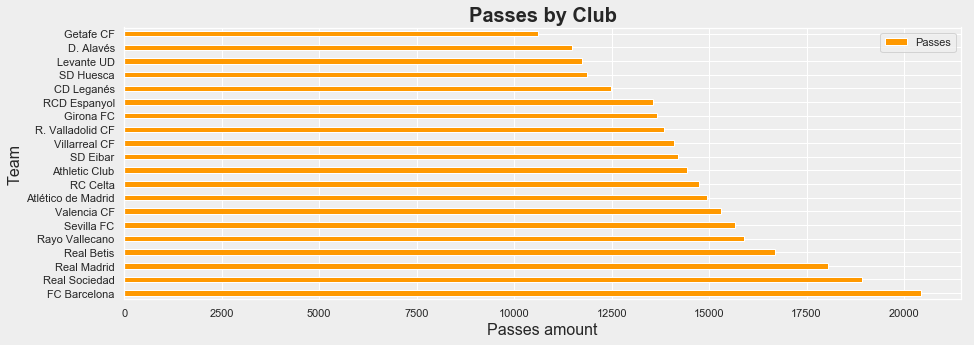

In [21]:
#Ve khung bieu do
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)

passes_club.plot(kind='barh', ax=ax, color='#FF9900', width=0.4, legend=True, stacked = True)
plt.xlabel('Passes amount', size = 16)
plt.ylabel('Team', size = 16)
plt.title('Passes by Club', size = 20, weight='bold')
plt.show()

#### <span style="color: blue">Nhận xét:</span>

 Mô tả lối chơi của các câu lạc bộ dựa vào số đường chuyền:

- *Nhìn vào biểu đồ, ta thấy FC Barcelona là câu lạc bộ có lối chơi thiên về kiểm soát, với số đường chuyền cao vượt trội so với các câu lạc bộ còn lại.*
- *Top 5 đội có số đường chuyền cao nhất vẫn là những câu lạc bộ có tầm vóc lớn nhất của giải đấu, như Barcelona, Real Madrid, Real Sociedad. Điều này phản ánh lối chơi áp đặt của những câu lạc bộ lớn trong những trận đấu của họ*
